# Spotify Tracks Popularity
This notebook uses the Spotify tracks dataset (link to Kaggle dataset: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset). The main objective of this notebook is to do an EDA phase on the data to gain some insights on it, and then use a regression algorithm to obtain the tracks' popularity.

## EDA
Explore the data, applying some normalization in the dataset, and guessing the most important features for the popularity target.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

dataset = pd.read_csv("./dataset.csv", index_col=0) # use the first column as index
dataset.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [2]:
dataset.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Text(0.5, 1.0, 'Genre of the song')

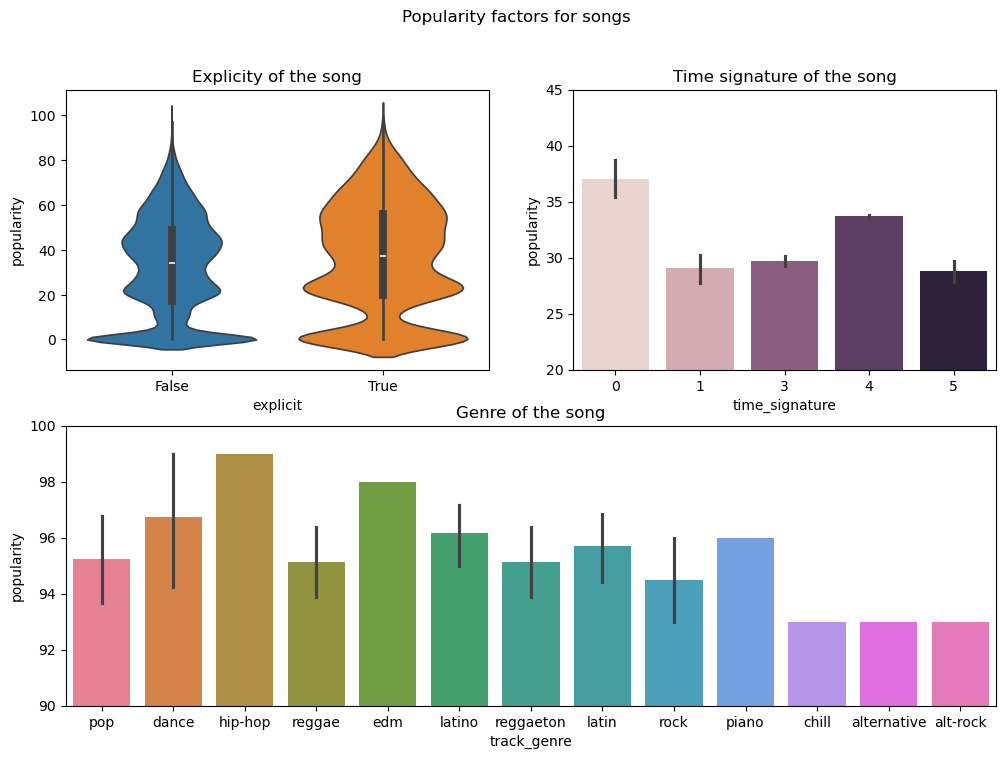

In [3]:
dataset.sort_values("popularity", inplace=True, ascending=False)

fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax2.set_ylim([20, 45])
ax3 = plt.subplot(2,1,2)
ax3.set_ylim([90, 100])
axes = [ax1, ax2, ax3]
fig.suptitle('Popularity factors for songs')


# plot the explicity of the song
sns.violinplot(ax=axes[0], data=dataset, x="explicit", y="popularity", hue="explicit", legend=False)
axes[0].set_title("Explicity of the song")

# plot the time signature
sns.barplot(ax=axes[1], data=dataset, x="time_signature", y="popularity", hue="time_signature", legend=False)
axes[1].set_title("Time signature of the song")

# plot the track genre
sns.barplot(ax=axes[2], data=dataset.iloc[0:50], x="track_genre", y="popularity", hue="track_genre", legend=False)
axes[2].set_title("Genre of the song")

In [4]:
# normalize the loudness
max_loudness = dataset["loudness"].max()
min_loudness = dataset["loudness"].min()
for i in range(dataset.shape[0]):
    dataset.loc[i, "loudness"] = 1-((dataset.loc[i, "loudness"] - min_loudness)/(max_loudness - min_loudness))

<ErrorbarContainer object of 3 artists>

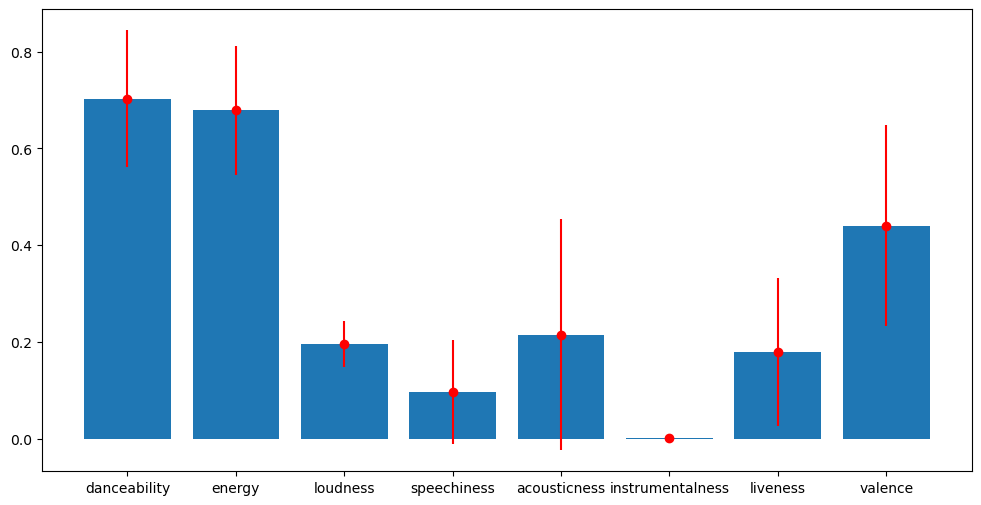

In [5]:
# check the main parameters given by Spotify (danceability, energy, loudness, ...)
stats_cols = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]
mean = dataset[stats_cols][:100].mean()
std_dev = dataset[stats_cols][:100].std()
plt.figure(figsize=(12, 6))
plt.bar(mean.index, mean.values)
plt.errorbar(x=mean.index, y=mean.values, yerr=std_dev.values, fmt="o", color="r")

It looks like the majority of the most popular songs are loud, energic and danceable. Also, it seems like the time signature 0 is the most popular, along with the hip hop genre. On the other hand, other genres tend to be more variable in popularity.

## Feature Engineering
Modifying the features to apply a machine learning model to the data.

In [6]:
dataset.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,0.220243,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,0.220243,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,0.186449,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
88410,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,0.182398,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggae
30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,0.151767,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,edm


In [7]:
genres = dataset["track_genre"].unique()
len(genres)

114

In [8]:
# merge songs with same id by genre
track_genres = {}

for idx, row in dataset.iterrows():
    track_id = row['track_id']
    genre = row['track_genre']
    
    # note the genres found and add the separator
    if track_id in track_genres:
        if genre not in track_genres[track_id]:
            track_genres[track_id] += ';' + genre
    else:
        track_genres[track_id] = genre

# add the genre aggregation
dataset['track_genre'] = dataset['track_id'].map(track_genres)

# remove duplicates
dataset = dataset.drop_duplicates(subset='track_id', keep='first')

dataset.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,0.220243,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop;dance
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,0.186449,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
88410,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,0.182398,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggae;latino;reggaeton
30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,0.151767,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,edm;dance;pop
67359,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,5,0.179975,0,0.2530,0.09930,0.000291,0.126,0.187,106.672,4,latin;reggaeton;latino


In [9]:
dataset.drop(["track_id", "album_name", "track_name"], axis=1, inplace=True) # drop irrelevant features (album_name might be relevant)

In [10]:
# delete nan rows
idx = 65900
dataset.drop(index=idx, inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset.dropna(inplace=True)

In [11]:
n_artists = []
for artist_set in dataset["artists"]:
    n_artists.append(len(artist_set.split(";")))
print(f"Max number of artists in a song: {max(n_artists)}")

Max number of artists in a song: 38


My idea was to create a column for each artist in a song: for example, creating columns `first_artist`, `second_artist`, `third_artist`, ..., and splitting the `artists` column in those new columns, but since there are songs with a high number of artists, this is not doable. I'll just consider the first artist in the `artists` column.

In [12]:
for i in range(dataset.shape[0]):
    dataset.loc[i, "artists"] = dataset.loc[i, "artists"].split(";")[0]

In [13]:
# Now let's do some preprocessing on the columns: make them all numerical
cat_cols = dataset.select_dtypes(exclude=["number"]).columns
print(cat_cols)

Index(['artists', 'explicit', 'track_genre'], dtype='object')


In [14]:
dataset["explicit"] = dataset["explicit"].apply(lambda x: 1 if x else 0)

# create a column for each genre
for genre in genres:
    dataset.loc[:, genre] = 0
for i in range(dataset.shape[0]):
    for genre in dataset["track_genre"][i].split(";"):
        dataset.loc[i, genre] = 1

In [15]:
artists = dataset["artists"].unique()
len(artists)

17648

We can't do the same thing as before, with the genre, since it would create too many features. So, we'll just remove the `artists` column.

In [16]:
dataset.drop(["artists", "track_genre"], axis=1, inplace=True)
dataset.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,forro,heavy-metal,detroit-techno,black-metal,honky-tonk,study,grindcore,tango,romance,iranian
0,100,156943,0,0.714,0.472,2,0.220243,1,0.0864,0.01300,...,0,0,0,0,0,0,0,0,0,0
1,99,198937,0,0.621,0.782,2,0.186449,1,0.0440,0.01250,...,0,0,0,0,0,0,0,0,0,0
2,98,162637,0,0.835,0.679,7,0.182398,0,0.0364,0.58300,...,0,0,0,0,0,0,0,0,0,0
3,98,175238,1,0.561,0.965,7,0.151767,0,0.0343,0.00383,...,0,0,0,0,0,0,0,0,0,0
4,97,243716,0,0.650,0.715,5,0.179975,0,0.2530,0.09930,...,0,0,0,0,0,0,0,0,0,0


Now, since the dataset has 129 columns, we do have to fight the dimensionality curse, and, to reduce the number of columns, we'll use the **PCA** (Principal Component Analysis) technique.

In [17]:
# first of all, we need to scale the features used
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(dataset.drop("popularity", axis=1))

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30) # project the dataset in 30 dimensions
X_new = pca.fit_transform(X_scaled)
cols = ["component_" + str(i) for i in range(30)]
X_reduced = pd.DataFrame(data=X_new, columns=cols)
X_reduced.head()

,component_0,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,...,component_20,component_21,component_22,component_23,component_24,component_25,component_26,component_27,component_28,component_29
0,-0.979488,0.847217,-0.654992,-1.481272,2.986790,1.003947,-0.743127,-0.575051,-0.111901,-1.223194,...,-1.699691,2.613350,-4.391226,-2.805523,-1.386945,-0.814180,0.518254,-0.710197,0.140082,-0.177958
1,-1.482203,1.083106,0.304455,-0.088695,0.214410,-0.337031,0.147046,0.360193,0.104399,-0.359771,...,-0.381948,2.366302,-1.163340,-0.918173,0.338586,-1.400653,0.091665,-0.817117,0.286697,0.295789
2,-3.750139,13.429106,8.071076,-1.482583,-1.967864,0.513431,0.120045,-2.070980,0.299136,-0.200982,...,0.660316,-1.201025,0.072867,0.921835,0.198856,0.363032,-0.462808,0.227676,0.246806,-0.129091
3,-3.062674,0.477093,-0.896503,-2.224100,7.651430,3.577853,-1.678758,-1.606317,0.203831,-0.823402,...,-1.361294,2.192353,-3.836901,-2.465860,-1.415654,-0.565945,0.198516,-0.777355,-0.544767,-0.294763
4,-3.250673,10.537114,7.780950,-0.745749,-1.392996,1.804465,0.430527,-0.814137,0.642791,0.535775,...,-0.134336,-0.164177,1.266491,-0.787075,-0.286726,1.274663,1.122866,0.945898,-0.346758,0.288392


## Training
Then, we proceed using the Decision Tree model to predict the popularity.

In [19]:
from sklearn.model_selection import train_test_split
# split the dataset into train and test
y = dataset["popularity"]/100
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
model

DecisionTreeRegressor()

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_loss = mean_squared_error(y_test, y_pred) 
print(f"[MSE] Model loss: {mse_loss}") # distance squared, susceptible to outliers
mae_loss = mean_absolute_error(y_test, y_pred)
print(f"[MAE] Model loss: {mae_loss}") # distance using absolute function
r2_loss = r2_score(y_test, y_pred)
print(f"[R2] Model loss: {r2_loss}") # variance in output data 

[MSE] Model loss: 0.03921494352654164
[MAE] Model loss: 0.12056121217869743
[R2] Model loss: 0.06287025641800481
